In [22]:
import os
import time
import random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

fatal: destination path 'yolov5' already exists and is not an empty directory.
Defaulting to user installation because normal site-packages is not writeable


In [24]:
img_h, img_w, num_channels = (380, 676, 3) 
df = pd.read_csv('data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True) #rename the imgae column as the convention in yolo5
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
# remove the file extension from the image id column
df['x_center'] = (df['xmin'] + df['xmax'])/2 # center coordinate calclations
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin'] # wifht and height calculation
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w   # Normalization of coordinates they should be between 0 and 1
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [49]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'data/training_images/{image}.jpg')
img.shape

Image ID: vid_4_2100


(380, 676, 3)

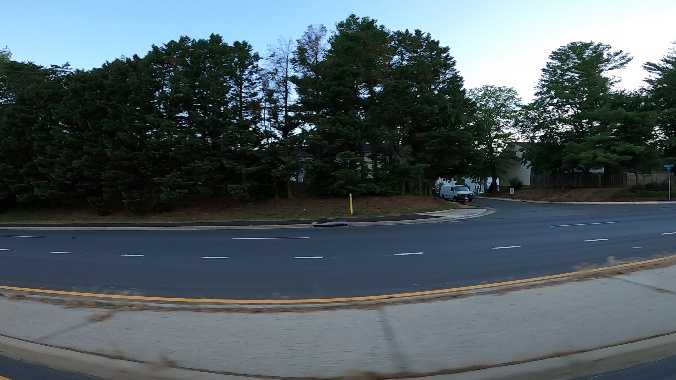

In [58]:
image = random.choice(index)
Image(filename=f'data/training_images/{image}.jpg',width=600)

In [51]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("data/{}/{}.jpg".format(source,name),'/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

100%|████████████████████████████████████████| 355/355 [00:00<00:00, 749.72it/s]


In [52]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source data/testing_images
# this part of the code determines the directories for the yolofile the weights to be loaded,
# setting the input imgae sizes, and confidence score setup

zsh:1: command not found: python


In [53]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("runs/detect.py"):
    predicted_files.extend(filenames)

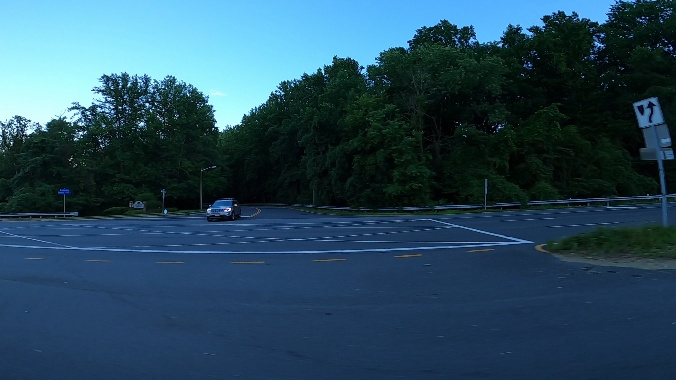

In [59]:
Image(filename='data/training_images/vid_4_1020.jpg')

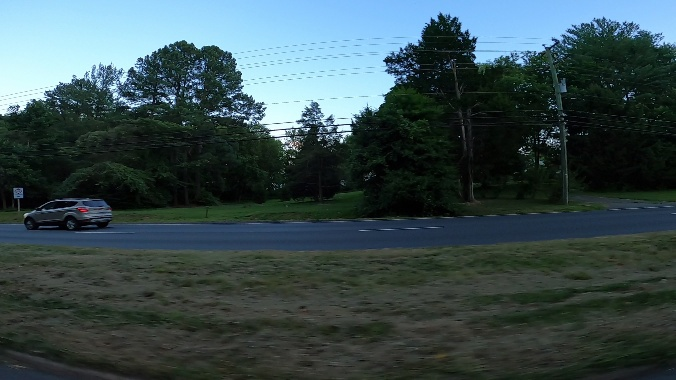

In [55]:
Image(filename='data/training_images/vid_4_10000.jpg')